In [ ]:
import pandas as pd
import numpy as np
import os, sys

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from math import sqrt

In [ ]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 115 kB/s 
     |████████████████████████████████| 13.1 MB 24.2 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=e98f6db93960324284a3ffc88e663a593377f52b4d721f31e39368b85baadb38
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from pdpbox import pdp, info_plots

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/water")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/water'

In [ ]:
!pip install xlrd

In [ ]:
import xlrd

In [ ]:
!pip install openpyxl

In [ ]:
import openpyxl

### 데이터 전처리

In [ ]:
water = pd.read_excel("1_세종보상류정리_정리_씨이기술자료_기상청자료_최종정리.xlsx", engine='openpyxl', sheet_name=0)

In [ ]:
water

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,금본H,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 128,Unnamed: 129,수공 수문운영자료,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137
0,DATE,ID,YEAR,MONTH,ST,DATE_금본H,WATERSHED_금본H,SITE_금본H,Q_금본H,TEMP_금본H,...,합계 일사량(MJ/m2),선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절
1,DATE,ID,YEAR,MONTH,ST,DATE_금본H,WATERSHED_금본H,SITE_금본H,Q_금본H,TEMP_금본H,...,일사량_합계,누가일사량_선행7일,저수량_세종보,총방류량_세종보,체류시간_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간_대청조절,선행7일평균체류시간_대청조절
2,2013-01-08 00:00:00,2013-1-1회차,2013.0,1.0,1회차,2013-01-08 00:00:00,금강,연기,NaN,2.7,...,11.16,70.89,5.62,73.8,0.881386,0.943773,3.245,61.907,0.606682,0.615222
3,2013-01-16 00:00:00,2013-1-2회차,2013.0,1.0,2회차,2013-01-16 00:00:00,금강,연기,62.084,3.5,...,4.25,59.79,5.45,82.3,0.766448,0.883738,3.467,63.841,0.628551,0.635685
4,2013-01-22 00:00:00,2013-1-3회차,2013.0,1.0,3회차,2013-01-22 00:00:00,금강,연기,186.323,3.6,...,2.22,46.82,5.99,138.7,0.499846,0.671401,3.467,66.411,0.604227,0.569575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2021-11-09 00:00:00,2021-11-2회차,2021.0,11.0,2회차,2021-11-09 00:00:00,금강,연기,65.189,12.8,...,5.09,70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2021-11-25 00:00:00,2021-11-3회차,2021.0,11.0,3회차,2021-11-25 00:00:00,금강,연기,47.929,10.7,...,10.66,55.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,2021-12-01 00:00:00,2021-12-1회차,2021.0,12.0,1회차,2021-12-01 00:00:00,금강,연기,86.717,8.2,...,8.13,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,2021-12-07 00:00:00,2021-12-2회차,2021.0,12.0,2회차,2021-12-07 00:00:00,금강,연기,51.378,8.2,...,9.43,58.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
water2 = water.rename(columns=water.iloc[0])
water2 = water2.iloc[2:, :] 
water2.drop(columns = ['ID', 'YEAR', 'MONTH', 'DATE_금본H','WATERSHED_금본H','SITE_금본H'], inplace=True)
water2 = water2.reset_index(drop=True)
water2


,DATE,ST,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,EC_금본H,...,합계 일사량(MJ/m2),선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절
0,2013-01-08 00:00:00,1회차,NaN,2.7,7.7,14.9,1.3,4.8,0.9,311.0,...,11.16,70.89,5.62,73.8,0.881386,0.943773,3.245,61.907,0.606682,0.615222
1,2013-01-16 00:00:00,2회차,62.084,3.5,7.6,14.3,1.3,5.1,2.7,283.0,...,4.25,59.79,5.45,82.3,0.766448,0.883738,3.467,63.841,0.628551,0.635685
2,2013-01-22 00:00:00,3회차,186.323,3.6,7.4,14.8,5.0,12.9,44.6,350.0,...,2.22,46.82,5.99,138.7,0.499846,0.671401,3.467,66.411,0.604227,0.569575
3,2013-01-31 00:00:00,4회차,164.115,4.8,7.6,11.6,1.8,4.6,5.4,216.0,...,11.2,81.68,5.9,158.4,0.431105,0.430871,2.89,144.525,0.231441,0.230326
4,2013-02-06 00:00:00,1회차,197.388,4.0,7.5,14.1,1.8,4.2,5.4,219.0,...,4.25,44.57,5.14,203.5,0.292338,0.358577,2.747,146.226,0.21743,0.237994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2021-11-09 00:00:00,2회차,65.189,12.8,8.1,9.9,3.3,6.4,7.2,507.0,...,5.09,70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,2021-11-25 00:00:00,3회차,47.929,10.7,8.1,11.5,1.2,5.8,2.8,516.0,...,10.66,55.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,2021-12-01 00:00:00,1회차,86.717,8.2,8.1,11.4,6.2,8.5,21.2,447.0,...,8.13,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2021-12-07 00:00:00,2회차,51.378,8.2,8.0,12.0,1.8,5.9,3.6,515.0,...,9.43,58.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
water2.iloc[[218]]

,DATE,ST,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,EC_금본H,...,합계 일사량(MJ/m2),선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절
218,2017-11-15 00:00:00,2회차,55.709,10.9,7.9,10.1,1.0,5.3,5.8,444.0,...,10.58,79.15,2.615,55.171,0.548589,1.07691,2.729,28.77,1.097868,1.136641


In [ ]:
bo = []
for i in range(392):
  if i < 218:
    bo.append(0)
  else:
    bo.append(1)
print(bo)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
water2.insert(2, "보개방", bo)

In [ ]:
#water2.iloc[210:230] [218:224]
bf_bo = water2.iloc[:218]
af_bo = water2.iloc[224:]

In [ ]:
full_date = water2.iloc[:,[0]]
full_date

,DATE
0,2013-01-08 00:00:00
1,2013-01-16 00:00:00
2,2013-01-22 00:00:00
3,2013-01-31 00:00:00
4,2013-02-06 00:00:00
...,...
387,2021-11-09 00:00:00
388,2021-11-25 00:00:00
389,2021-12-01 00:00:00
390,2021-12-07 00:00:00


In [ ]:
bf_date = bf_bo.iloc[:,[0]]
af_date = af_bo.iloc[:,[0]]

In [ ]:
bf_date

,DATE
0,2013-01-08 00:00:00
1,2013-01-16 00:00:00
2,2013-01-22 00:00:00
3,2013-01-31 00:00:00
4,2013-02-06 00:00:00
...,...
213,2017-09-26 00:00:00
214,2017-10-11 00:00:00
215,2017-10-19 00:00:00
216,2017-10-25 00:00:00


In [ ]:
bf_bo

,DATE,ST,보개방,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,...,합계 일사량(MJ/m2),선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절
0,2013-01-08 00:00:00,1회차,0,NaN,2.7,7.7,14.9,1.3,4.8,0.9,...,11.16,70.89,5.62,73.8,0.881386,0.943773,3.245,61.907,0.606682,0.615222
1,2013-01-16 00:00:00,2회차,0,62.084,3.5,7.6,14.3,1.3,5.1,2.7,...,4.25,59.79,5.45,82.3,0.766448,0.883738,3.467,63.841,0.628551,0.635685
2,2013-01-22 00:00:00,3회차,0,186.323,3.6,7.4,14.8,5.0,12.9,44.6,...,2.22,46.82,5.99,138.7,0.499846,0.671401,3.467,66.411,0.604227,0.569575
3,2013-01-31 00:00:00,4회차,0,164.115,4.8,7.6,11.6,1.8,4.6,5.4,...,11.2,81.68,5.9,158.4,0.431105,0.430871,2.89,144.525,0.231441,0.230326
4,2013-02-06 00:00:00,1회차,0,197.388,4.0,7.5,14.1,1.8,4.2,5.4,...,4.25,44.57,5.14,203.5,0.292338,0.358577,2.747,146.226,0.21743,0.237994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2017-09-26 00:00:00,4회차,0,50.507,23.9,8.3,10.2,3.6,7.5,16.2,...,19.28,133.08,5.165,49.232,1.214253,1.328537,2.579,18.464,1.616634,1.616363
214,2017-10-11 00:00:00,1회차,0,48.653,22.8,8.4,10.4,2.8,6.7,16.2,...,3.77,77.83,5.748,47.341,1.405289,1.438528,2.201,17.257,1.476186,1.567415
215,2017-10-19 00:00:00,2회차,0,34.073,17.3,7.9,9.4,1.9,5.4,8.6,...,14.45,97.81,5.71,33.081,1.997762,1.620973,2.26,16.952,1.543028,1.548317
216,2017-10-25 00:00:00,3회차,0,47.186,16.6,7.9,9.7,1.1,5.3,7.4,...,16.06,112.46,5.71,46.292,1.427632,1.489089,2.836,28.012,1.171786,1.280328


In [ ]:
af_bo

,DATE,ST,보개방,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,...,합계 일사량(MJ/m2),선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절
224,2018-01-25 00:00:00,3회차,1,37.34,0.1,7.7,13.6,2.5,6.8,1.4,...,7.33,59.55,0.983,24.999,0.455111,0.434006,2.5,20.909,1.383863,1.513675
225,2018-01-31 00:00:00,4회차,1,32.391,2.2,7.6,13.1,2.0,7.1,3.2,...,8.68,63.16,0.986,24.328,0.469091,0.465193,2.5,19.223,1.505238,1.561627
226,2018-02-06 00:00:00,1회차,1,31.958,0.4,7.7,13.7,2.2,7.1,2.4,...,9.72,68.82,0.985,24.388,0.467462,0.469074,2.6,20.261,1.485247,1.492898
227,2018-02-22 00:00:00,2회차,1,32.514,3.9,7.8,12.9,3.9,8.3,6.6,...,10.3,61.65,0.985,23.639,0.482273,0.48537,2.5,21.507,1.345385,1.382654
228,2018-02-27 00:00:00,3회차,1,33.04,5.9,7.7,12.0,3.7,8.6,9.3,...,8.33,63.03,0.985,23.133,0.492823,0.491214,2.4,21.414,1.297178,1.363446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2021-11-09 00:00:00,2회차,1,65.189,12.8,8.1,9.9,3.3,6.4,7.2,...,5.09,70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,2021-11-25 00:00:00,3회차,1,47.929,10.7,8.1,11.5,1.2,5.8,2.8,...,10.66,55.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,2021-12-01 00:00:00,1회차,1,86.717,8.2,8.1,11.4,6.2,8.5,21.2,...,8.13,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2021-12-07 00:00:00,2회차,1,51.378,8.2,8.0,12.0,1.8,5.9,3.6,...,9.43,58.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
before_bo = bo[:218]
after_bo = bo[224:]

In [ ]:
# #not split
# water_gbH = water2.filter(regex='금본H')
# water_gbH.insert(0, "보개방여부", bo)
# water_gbH = pd.concat([full_date, water_gbH], axis=1)

# water_mhC = water2.filter(regex='미호C')
# water_mhC.insert(0, "보개방여부", bo)
# water_mhC = pd.concat([full_date, water_mhC], axis=1)

# water_gbG_1 = water2.filter(regex='금본G_1')
# water_gbG_1.insert(0, "보개방여부", bo)
# water_gbG_1 = pd.concat([full_date, water_gbG_1], axis=1)

# water_gcA = water2.filter(regex='갑천A')
# water_gcA.insert(0, "보개방여부", bo)
# water_gcA = pd.concat([full_date, water_gcA], axis=1)

# water_dcF = water2.filter(regex='금본F')
# water_dcF.insert(0, "보개방여부", bo)
# water_dcF = pd.concat([full_date, water_dcF], axis=1)


In [ ]:
# split
bf_gbH = bf_bo.filter(regex='금본H')
af_gbH = af_bo.filter(regex='금본H')
bf_gbH.insert(0, "보개방여부", before_bo)
bf_gbH = pd.concat([bf_date, bf_gbH], axis=1)
af_gbH.insert(0, "보개방여부", after_bo)
af_gbH = pd.concat([af_date, af_gbH], axis=1)

bf_mhC = bf_bo.filter(regex='미호C')
af_mhC = af_bo.filter(regex='미호C')
bf_mhC.insert(0, "보개방여부", before_bo)
bf_mhC = pd.concat([bf_date, bf_mhC], axis=1)
af_mhC.insert(0, "보개방여부", after_bo)
af_mhC = pd.concat([af_date, af_mhC], axis=1)

bf_gcA = bf_bo.filter(regex='갑천A')
af_gcA = af_bo.filter(regex='갑천A')
bf_gcA.insert(0, "보개방여부", before_bo)
bf_gcA = pd.concat([bf_date, bf_gcA], axis=1)
af_gcA.insert(0, "보개방여부", after_bo)
af_gcA = pd.concat([af_date, af_gcA], axis=1)

bf_gbG2 = bf_bo.filter(regex='금본G2')
af_gbG2 = af_bo.filter(regex='금본G2')
bf_gbG2.insert(0, "보개방여부", before_bo)
bf_gbG2 = pd.concat([bf_date, bf_gbG2], axis=1)
af_gbG2.insert(0, "보개방여부", after_bo)
af_gbG2 = pd.concat([af_date, af_gbG2], axis=1)

bf_gbG_1 = bf_bo.filter(regex='금본G_1')
af_gbG_1 = af_bo.filter(regex='금본G_1')
bf_gbG_1.insert(0, "보개방여부", before_bo)
bf_gbG_1 = pd.concat([bf_date, bf_gbG_1], axis=1)
af_gbG_1.insert(0, "보개방여부", after_bo)
af_gbG_1 = pd.concat([af_date, af_gbG_1], axis=1)

bf_gbF = bf_bo.filter(regex='금본F')
af_gbF = af_bo.filter(regex='금본F')
bf_gbF.insert(0, "보개방여부", before_bo)
bf_gbF = pd.concat([bf_date, bf_gbF], axis=1)
af_gbF.insert(0, "보개방여부", after_bo)
af_gbF = pd.concat([af_date, af_gbF], axis=1)

In [ ]:
# not split
full_gbH = pd.concat([bf_gbH, af_gbH], axis=0)
full_mhC = pd.concat([bf_mhC, af_mhC], axis=0)
full_gcA = pd.concat([bf_gcA, af_gcA], axis=0)
full_gbG2 = pd.concat([bf_gbG2, af_gbG2], axis=0)
full_gbG_1 = pd.concat([bf_gbG_1, af_gbG_1], axis=0)
full_gbF = pd.concat([bf_gbF, af_gbF], axis=0)

In [ ]:
# 금본H dataset
#bf_gbH = bf_gbG_1.drop(columns = ['DATE_금본G_1', 'WATERSHED_금본G_1', 'SITE_금본G_1']) # 금본G_1 before 
#af_gbH = af_gbG_1.drop(columns = ['DATE_금본G_1', 'WATERSHED_금본G_1', 'SITE_금본G_1']) # 금본G_1 after
#full_gbH.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H_not_split.xlsx')
#bf_gbH.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H_before.xlsx')
#af_gbH.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H_after.xlsx')

In [ ]:
# 미호C dataset
bf_mhC = bf_mhC.drop(columns = ['DATE_미호C', 'WATERSHED_미호C', 'SITE_미호C']) # 미호C before 
af_mhC = af_mhC.drop(columns = ['DATE_미호C', 'WATERSHED_미호C', 'SITE_미호C']) # 미호C after
full_mhC = full_mhC.drop(columns = ['DATE_미호C', 'WATERSHED_미호C', 'SITE_미호C']) # 미호C full

# full_mhC.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/미호C_not_split.xlsx')
# bf_mhC.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/미호C_before.xlsx')
# af_mhC.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/미호C_after.xlsx')

In [ ]:
# 금본G_1 dataset
bf_gbG_1 = bf_gbG_1.drop(columns = ['DATE_금본G_1', 'WATERSHED_금본G_1', 'SITE_금본G_1']) # 금본G_1 before 
af_gbG_1 = af_gbG_1.drop(columns = ['DATE_금본G_1', 'WATERSHED_금본G_1', 'SITE_금본G_1']) # 금본G_1 after
full_gbG_1 = full_gbG_1.drop(columns = ['DATE_금본G_1', 'WATERSHED_금본G_1', 'SITE_금본G_1']) # 미호C full

# full_gbG_1.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1_not_split.xlsx')
# bf_gbG_1.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1_before.xlsx')
# af_gbG_1.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1_after.xlsx')

In [ ]:
# 갑천A dataset
bf_gcA = bf_gcA.drop(columns = ['DATE_갑천A', 'WATERSHED_갑천A', 'SITE_갑천A']) # 갑천A before 
af_gcA = af_gcA.drop(columns = ['DATE_갑천A', 'WATERSHED_갑천A', 'SITE_갑천A']) # 갑천A after
full_gcA = full_gcA.drop(columns = ['DATE_갑천A', 'WATERSHED_갑천A', 'SITE_갑천A']) # 갑천A full

# full_gcA.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A_not_split.xlsx')
# bf_gcA.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A_before.xlsx')
# af_gcA.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A_after.xlsx')

In [ ]:
# 금본F dataset
bf_gbF = bf_gbF.drop(columns = ['DATE_금본F', 'WATERSHED_금본F', 'SITE_금본F']) # 금본F before 
af_gbF = af_gbF.drop(columns = ['DATE_금본F', 'WATERSHED_금본F', 'SITE_금본F']) # 금본F after
full_gbF = full_gbF.drop(columns = ['DATE_금본F', 'WATERSHED_금본F', 'SITE_금본F']) # 금본F full

#full_gbF.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F_not_split.xlsx')
#bf_gbF.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F_before.xlsx')
#af_gbF.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F_after.xlsx')

In [ ]:
weather = water2.iloc[:, -16:-8]

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   평균기온(°C)_대전133  392 non-null    object
 1   선행7일_평균기온       392 non-null    object
 2   강수 계속시간(hr)     166 non-null    object
 3   선행7일_누가강수계속시간   392 non-null    object
 4   일강수량(mm)        166 non-null    object
 5   선행7일_누가강수량      392 non-null    object
 6   합계 일사량(MJ/m2)   391 non-null    object
 7   선행7일_누가일사량      392 non-null    object
dtypes: object(8)
memory usage: 24.6+ KB


In [ ]:
weather['합계 일사량(MJ/m2)'] == 'NaN'

0      False
1      False
2      False
3      False
4      False
       ...  
387    False
388    False
389    False
390    False
391    False
Name: 합계 일사량(MJ/m2), Length: 392, dtype: bool

In [ ]:
bf_weather = weather.iloc[:218]
af_weather = weather.iloc[224:]
bf_weather.insert(0, "보개방여부", before_bo)
bf_weather = pd.concat([bf_date, bf_weather], axis=1)
af_weather.insert(0, "보개방여부", after_bo)
af_weather = pd.concat([af_date, af_weather], axis=1)
full_weather = pd.concat([bf_weather, af_weather], axis=0)

In [ ]:
full_weather.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/기상청_not_split.xlsx')
bf_weather.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/기상청_before.xlsx')
af_weather.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/기상청_after.xlsx')

In [ ]:
bf_gbH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATE      218 non-null    object
 1   보개방여부     218 non-null    int64 
 2   Q_금본H     206 non-null    object
 3   TEMP_금본H  218 non-null    object
 4   PH_금본H    218 non-null    object
 5   DO_금본H    218 non-null    object
 6   BOD_금본H   218 non-null    object
 7   COD_금본H   218 non-null    object
 8   SS_금본H    218 non-null    object
 9   EC_금본H    218 non-null    object
 10  TN_금본H    218 non-null    object
 11  TP_금본H    218 non-null    object
 12  TOC_금본H   217 non-null    object
 13  CHLA_금본H  218 non-null    object
dtypes: int64(1), object(13)
memory usage: 24.0+ KB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

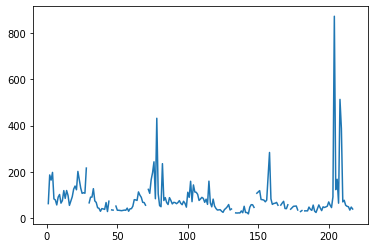

In [ ]:
plt.plot(bf_gbH['Q_금본H'])

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
gb_Q = bf_gbH['Q_금본H']
gb_Q.dtypes
#gb_Q = gb_Q.astype('float')

dtype('O')

In [ ]:
# gb_Q = bf_gbH[['DATE', 'Q_금본H']]
# gb_T = bf_gbH['DATE','TOC_금본H']

In [ ]:
bf_gbH['Q_금본H'] =  pd.to_numeric(bf_gbH['Q_금본H'])
bf_gbH['TOC_금본H'] = pd.to_numeric(bf_gbH['TOC_금본H'])
af_gbH['Q_금본H'] =  pd.to_numeric(af_gbH['Q_금본H'])
af_gbH['TOC_금본H'] = pd.to_numeric(af_gbH['TOC_금본H'])

In [ ]:
gbH_bf = bf_gbH.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbH_bf = gbH_bf.fillna(method='bfill')
gbH_af = af_gbH.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbH_af = gbH_af.fillna(method='bfill')
gbH_full = pd.concat([gbH_bf, gbH_af], axis=0)

In [ ]:
#금본H 결측체 대체 dataset
gbH_full.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_not_split.xlsx')
gbH_bf.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_before.xlsx')
gbH_af.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_after.xlsx')

In [ ]:
bf_mhC['Q_미호C'] = pd.to_numeric(bf_mhC['Q_미호C'])

In [ ]:
mhC_bf = bf_mhC.interpolate(method = 'polynomial', order = 3, limit_direction='both')
mhC_bf = mhC_bf.fillna(method = 'bfill')
mhC_af = af_mhC.interpolate(method = 'polynomial', order = 3, limit_direction='both')
mhC_af = mhC_af.fillna(method = 'bfill')
mhC_full = pd.concat([mhC_bf, mhC_af], axis=0)

In [ ]:
#미호C 결측체 대체 dataset
mhC_full.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_not_split.xlsx')
mhC_bf.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_before.xlsx')
mhC_af.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본H(결측치대체)_after.xlsx')

In [ ]:
full_gbG_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 391
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        386 non-null    object
 1   보개방여부       386 non-null    int64 
 2   Q_금본G_1     364 non-null    object
 3   TEMP_금본G_1  364 non-null    object
 4   PH_금본G_1    364 non-null    object
 5   DO_금본G_1    364 non-null    object
 6   BOD_금본G_1   364 non-null    object
 7   COD_금본G_1   364 non-null    object
 8   SS_금본G_1    364 non-null    object
 9   EC_금본G_1    364 non-null    object
 10  TN_금본G_1    364 non-null    object
 11  TP_금본G_1    364 non-null    object
 12  TOC_금본G_1   364 non-null    object
dtypes: int64(1), object(12)
memory usage: 42.2+ KB


In [ ]:
bf_gbG_1.columns

Index(['DATE', '보개방여부', 'Q_금본G_1', 'TEMP_금본G_1', 'PH_금본G_1', 'DO_금본G_1',
       'BOD_금본G_1', 'COD_금본G_1', 'SS_금본G_1', 'EC_금본G_1', 'TN_금본G_1',
       'TP_금본G_1', 'TOC_금본G_1'],
      dtype='object')

In [ ]:
bf_gbG_1_columns = ['Q_금본G_1', 'TEMP_금본G_1', 'PH_금본G_1', 'DO_금본G_1',
                    'BOD_금본G_1', 'COD_금본G_1', 'SS_금본G_1', 'EC_금본G_1', 'TN_금본G_1',
                    'TP_금본G_1', 'TOC_금본G_1']

In [ ]:
for i in bf_gbG_1_columns:
  bf_gbG_1[i] = pd.to_numeric(bf_gbG_1[i])

In [ ]:
gbG_1_bf = bf_gbG_1.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbG_1_bf = gbG_1_bf.fillna(method='bfill')
gbG_1_af = af_gbG_1.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbG_1_af = gbG_1_af.fillna(method='bfill')
gbG_1_full = pd.concat([gbG_1_bf, gbG_1_af], axis=0)

In [ ]:
#금본G_1 결측체 대체 dataset
gbG_1_full.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1(결측치대체)_not_split.xlsx')
gbG_1_bf.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1(결측치대체)_before.xlsx')
gbG_1_af.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본G_1(결측치대체)_after.xlsx')

In [ ]:
bf_gcA['Q_갑천A'] =  pd.to_numeric(bf_gcA['Q_갑천A'])
bf_gcA['Q_갑천A'] = pd.to_numeric(bf_gcA['Q_갑천A'])
af_gcA['Q_갑천A'] =  pd.to_numeric(af_gcA['Q_갑천A'])
af_gcA['Q_갑천A'] = pd.to_numeric(af_gcA['Q_갑천A'])

In [ ]:
gcA_bf = bf_gcA.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gcA_bf = gcA_bf.fillna(method='bfill')
gcA_af = af_gcA.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gcA_af = gcA_af.fillna(method='bfill')
gcA_full = pd.concat([gcA_bf, gcA_af], axis=0)

In [ ]:
#갑천A 결측체 대체 dataset
gcA_full.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A(결측치대체)_not_split.xlsx')
gcA_bf.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A(결측치대체)_before.xlsx')
gcA_af.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/갑천A(결측치대체)_after.xlsx')

In [ ]:
full_gbF_columns = ['Q_금본F', 'TEMP_금본F', 'PH_금본F', 'DO_금본F', 'BOD_금본F',
                    'COD_금본F', 'SS_금본F', 'EC_금본F', 'TN_금본F', 'TP_금본F', 'TOC_금본F',
                    'CHLA_금본F']

In [ ]:
for i in full_gbF_columns:
  bf_gbF[i] = pd.to_numeric(bf_gbF[i])
  af_gbF[i] = pd.to_numeric(af_gbF[i])

In [ ]:
gbF_bf = bf_gbF.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbF_bf = gbF_bf.fillna(method='bfill')
gbF_af = af_gbF.interpolate(method = 'polynomial', order=3, limit_direction='both')
#gb_q.fillna(method='ffill')
gbF_af = gbF_af.fillna(method='bfill')
gbF_full = pd.concat([gbF_bf, gbF_af], axis=0)

In [ ]:
#금본F(대청F) 결측체 대체 dataset
gbF_full.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F(결측치대체)_not_split.xlsx')
gbF_bf.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F(결측치대체)_before.xlsx')
gbF_af.to_excel(excel_writer = '/content/drive/MyDrive/Colab Notebooks/water/금본F(결측치대체)_after.xlsx')

### merge dataset

In [ ]:
upper = pd.read_csv("상류.csv", encoding = 'cp949')
down = pd.read_csv("하류.csv", encoding = 'cp949')
merge = pd.read_csv("merge_data.csv", encoding = 'cp949')

In [ ]:
merge = merge.loc[1:,:]
merge

,WEEK,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,EC_금본H,TN_금본H,...,선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절,보개방 여부
1,2013-01-20,150.826143,3.571429,7.457143,14.657143,3.942857,10.671429,32.628571,330.857143,4.866429,...,47.225714,5.802857,131.985714,0.526446,0.638016,3.191000,92.848429,0.452274,0.535597,0
2,2013-01-27,176.805286,4.114286,7.485714,13.428571,3.628571,9.342857,27.800000,292.571429,4.136429,...,65.642857,5.980000,170.671429,0.411258,0.445031,2.941143,144.624143,0.235387,0.291630,0
3,2013-02-03,183.128143,4.342857,7.542857,13.028571,1.800000,4.371429,5.400000,217.714286,2.800429,...,54.595714,5.437143,189.214286,0.341188,0.361192,2.920571,144.953000,0.233282,0.236838,0
4,2013-02-10,197.388000,4.000000,7.500000,14.100000,1.800000,4.200000,5.400000,219.000000,2.875000,...,82.541429,4.801429,117.828571,0.500739,0.413257,3.224571,87.214286,0.508782,0.345805,0
5,2013-02-17,131.747429,4.000000,7.500000,13.128571,1.800000,4.771429,4.600000,265.857143,4.036143,...,93.760000,3.724286,87.314286,0.498063,0.524460,3.326571,56.111286,0.687045,0.659288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2021-01-17,40.829143,3.242857,7.757143,13.242857,4.000000,7.100000,4.557143,528.285714,6.101429,...,62.697143,0.962571,41.008571,0.272101,0.276621,3.613857,18.592857,2.255950,2.197557,2
419,2021-01-24,41.130143,6.742857,7.771429,11.900000,3.942857,7.928571,11.114286,533.285714,5.975429,...,53.947143,0.962714,41.601429,0.268057,0.267426,3.574571,22.255714,1.866223,2.037820,2
420,2021-01-31,41.511571,6.342857,7.800000,12.185714,3.942857,7.500000,8.857143,534.285714,5.674714,...,67.700000,0.963429,41.984286,0.266025,0.266578,3.526143,21.560000,1.911175,1.884425,2
421,2021-02-07,41.411000,4.400000,7.800000,13.100000,4.400000,6.700000,3.600000,536.000000,5.465000,...,83.477143,0.960857,39.994286,0.278140,0.272724,3.436429,23.241429,1.712492,1.783088,2


In [ ]:
gbH = merge.filter(regex='금본H')
mhC = merge.filter(regex='미호C')
gbG = merge.filter(regex='금본G')
gbG_1 = merge.filter(regex='금본G_1')
gbG2 = merge.filter(regex='금본G2')
merges = pd.concat([gbH, mhC, gbG, gbG_1, gbG2], axis=1)

In [ ]:
merge_weather = merge[['평균기온(°C)_대전133', '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
                      '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
                      '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
                      '선행7일평균체류시간_대청조절']]
merge_bo = merge['보개방 여부']

In [ ]:
gbH = pd.concat([gbH, merge_weather, merge_bo], axis = 1)
mhC = pd.concat([mhC, merge_weather, merge_bo], axis = 1)
gbG = pd.concat([gbG, merge_weather, merge_bo], axis = 1)
gbG_1 = pd.concat([gbG_1, merge_weather, merge_bo], axis = 1)
gbG2 = pd.concat([gbG2, merge_weather, merge_bo], axis = 1)

#더미 변수
bo_type = pd.get_dummies(gbH['보개방 여부'], prefix='보개방 형태')
gbH = pd.concat([gbH, bo_type], axis = 1)

In [ ]:
condition1 = (merge['보개방 여부'] == 0)
condition2 = (merge['보개방 여부'] == 1)
condition3 = (merge['보개방 여부'] == 2)

gbH0 = gbH.loc[condition1]
gbH1 = gbH.loc[condition2]
gbH2 = gbH.loc[condition3]


#### full dataset ml

In [ ]:
merge

,WEEK,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,BOD_금본H,COD_금본H,SS_금본H,EC_금본H,TN_금본H,...,선행7일_누가일사량,저수량_세종보,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절,보개방 여부
1,2013-01-20,150.826143,3.571429,7.457143,14.657143,3.942857,10.671429,32.628571,330.857143,4.866429,...,47.225714,5.802857,131.985714,0.526446,0.638016,3.191000,92.848429,0.452274,0.535597,0
2,2013-01-27,176.805286,4.114286,7.485714,13.428571,3.628571,9.342857,27.800000,292.571429,4.136429,...,65.642857,5.980000,170.671429,0.411258,0.445031,2.941143,144.624143,0.235387,0.291630,0
3,2013-02-03,183.128143,4.342857,7.542857,13.028571,1.800000,4.371429,5.400000,217.714286,2.800429,...,54.595714,5.437143,189.214286,0.341188,0.361192,2.920571,144.953000,0.233282,0.236838,0
4,2013-02-10,197.388000,4.000000,7.500000,14.100000,1.800000,4.200000,5.400000,219.000000,2.875000,...,82.541429,4.801429,117.828571,0.500739,0.413257,3.224571,87.214286,0.508782,0.345805,0
5,2013-02-17,131.747429,4.000000,7.500000,13.128571,1.800000,4.771429,4.600000,265.857143,4.036143,...,93.760000,3.724286,87.314286,0.498063,0.524460,3.326571,56.111286,0.687045,0.659288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2021-01-17,40.829143,3.242857,7.757143,13.242857,4.000000,7.100000,4.557143,528.285714,6.101429,...,62.697143,0.962571,41.008571,0.272101,0.276621,3.613857,18.592857,2.255950,2.197557,2
419,2021-01-24,41.130143,6.742857,7.771429,11.900000,3.942857,7.928571,11.114286,533.285714,5.975429,...,53.947143,0.962714,41.601429,0.268057,0.267426,3.574571,22.255714,1.866223,2.037820,2
420,2021-01-31,41.511571,6.342857,7.800000,12.185714,3.942857,7.500000,8.857143,534.285714,5.674714,...,67.700000,0.963429,41.984286,0.266025,0.266578,3.526143,21.560000,1.911175,1.884425,2
421,2021-02-07,41.411000,4.400000,7.800000,13.100000,4.400000,6.700000,3.600000,536.000000,5.465000,...,83.477143,0.960857,39.994286,0.278140,0.272724,3.436429,23.241429,1.712492,1.783088,2


In [ ]:
merge = pd.concat([merge, bo_type], axis=1)
bod = merge.filter(regex='BOD')
cod = merge.filter(regex='COD')
ss = merge.filter(regex='SS')
chla = merge.filter(regex='CHLA')
depend_var = pd.concat([bod, cod, ss, chla], axis=1)
full_merge = pd.concat([depend_var, merge], axis=1)
full_merge = full_merge.drop(columns = ['보개방 여부', 'WEEK'], axis=1)

In [ ]:
full_merge

,BOD_금본H,BOD_미호C,BOD_금본G,BOD_금본G2,BOD_금본G_1,COD_금본H,COD_미호C,COD_금본G,COD_금본G2,COD_금본G_1,...,총방류량_세종보,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절,보개방 형태_0,보개방 형태_1,보개방 형태_2
1,3.942857,3.428571,1.928571,13.285714,3.157143,10.671429,7.657143,4.900000,25.971429,5.700000,...,131.985714,0.526446,0.638016,3.191000,92.848429,0.452274,0.535597,1,0,0
2,3.628571,2.814286,1.657143,7.200000,2.142857,9.342857,7.285714,4.500000,15.214286,4.871429,...,170.671429,0.411258,0.445031,2.941143,144.624143,0.235387,0.291630,1,0,0
3,1.800000,3.228571,1.471429,1.842857,1.128571,4.371429,6.757143,4.128571,5.200000,4.028571,...,189.214286,0.341188,0.361192,2.920571,144.953000,0.233282,0.236838,1,0,0
4,1.800000,3.714286,1.500000,2.100000,1.100000,4.200000,6.985714,5.814286,5.600000,4.000000,...,117.828571,0.500739,0.413257,3.224571,87.214286,0.508782,0.345805,1,0,0
5,1.800000,3.942857,1.428571,1.171429,1.528571,4.771429,7.985714,5.671429,4.314286,4.714286,...,87.314286,0.498063,0.524460,3.326571,56.111286,0.687045,0.659288,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4.000000,2.614286,1.442857,0.928571,1.785714,7.100000,8.085714,5.957143,3.585714,5.928571,...,41.008571,0.272101,0.276621,3.613857,18.592857,2.255950,2.197557,0,0,1
419,3.942857,4.157143,1.357143,0.585714,2.300000,7.928571,9.328571,6.342857,3.714286,5.628571,...,41.601429,0.268057,0.267426,3.574571,22.255714,1.866223,2.037820,0,0,1
420,3.942857,3.700000,1.685714,0.842857,2.114286,7.500000,9.042857,6.342857,3.585714,5.900000,...,41.984286,0.266025,0.266578,3.526143,21.560000,1.911175,1.884425,0,0,1
421,4.400000,3.700000,1.385714,1.100000,1.900000,6.700000,9.128571,6.471429,3.500000,6.200000,...,39.994286,0.278140,0.272724,3.436429,23.241429,1.712492,1.783088,0,0,1


In [ ]:
# y = 금본H chla 
gbH_X, gbH_y = pd.concat([full_merge.iloc[:, :14], full_merge.iloc[:, 16:]], axis=1), full_merge.iloc[:, 15]


In [ ]:
gbH_train, gbH_test, gbH_chla_train, gbH_chla_test = train_test_split(gbH_X, gbH_y, test_size = 0.2, random_state = 4141)

In [ ]:
gbH_train.shape, gbH_chla_train.shape

((337, 94), (337,))

In [ ]:
gbH_train_bo = gbH_train.iloc[:, -3:]
gbH_test_bo = gbH_test.iloc[:, -3:]
gbH_train_bo.shape, gbH_test_bo.shape

((337, 3), (85, 3))

In [ ]:
gbH_train_sc = gbH_train.iloc[:, :-3]
gbH_test_sc = gbH_test.iloc[:, :-3]
gbH_train_sc.shape, gbH_test_sc.shape

((337, 91), (85, 91))

In [ ]:
std = StandardScaler()
gbH_train_std = std.fit_transform(gbH_train_sc)
gbH_test_std = std.fit_transform(gbH_test_sc)

gbH_train_df = pd.DataFrame(gbH_train_std, columns = gbH_train_sc.columns)
gbH_test_df = pd.DataFrame(gbH_test_std, columns = gbH_test_sc.columns)

gbH_train_df.shape, gbH_test_df.shape

((337, 91), (85, 91))

In [ ]:
gbH_train_df = gbH_train_df.reset_index(drop=True)
gbH_train_bo = gbH_train_bo.reset_index(drop=True)
gbH_test_df = gbH_test_df.reset_index(drop=True)
gbH_test_bo = gbH_test_bo.reset_index(drop=True)

In [ ]:
gbH_train = pd.concat([gbH_train_df, gbH_train_bo], axis=1)
gbH_test = pd.concat([gbH_test_df, gbH_test_bo], axis=1)

In [ ]:
clf = RandomForestRegressor(random_state = 4141)
clf.fit(gbH_train, gbH_chla_train)
y_pred = clf.predict(gbH_test.values)

In [ ]:
r_2f = r2_score(gbH_chla_test, y_pred)
rmse = sqrt(mean_squared_error(gbH_chla_test, y_pred))
r_2f, rmse

(0.9608780312144317, 5.3792523727398605)

In [ ]:
data.shape

(422, 96)

In [ ]:
gbH_X.columns

Index(['BOD_금본H', 'BOD_미호C', 'BOD_금본G', 'BOD_금본G2', 'BOD_금본G_1', 'COD_금본H',
       'COD_미호C', 'COD_금본G', 'COD_금본G2', 'COD_금본G_1', 'SS_금본H', 'SS_미호C',
       'SS_금본G', 'SS_금본G2', 'CHLA_미호C', 'CHLA_금본G', 'Q_금본H', 'TEMP_금본H',
       'PH_금본H', 'DO_금본H', 'BOD_금본H', 'COD_금본H', 'SS_금본H', 'EC_금본H', 'TN_금본H',
       'TP_금본H', 'TOC_금본H', 'CHLA_금본H', 'Q_미호C', 'TEMP_미호C', 'PH_미호C',
       'DO_미호C', 'BOD_미호C', 'COD_미호C', 'SS_미호C', 'EC_미호C', 'TN_미호C', 'TP_미호C',
       'TOC_미호C', 'CHLA_미호C', 'Q_금본G', 'TEMP_금본G', 'PH_금본G', 'DO_금본G',
       'BOD_금본G', 'COD_금본G', 'SS_금본G', 'EC_금본G', 'TN_금본G', 'TP_금본G', 'TOC_금본G',
       'CHLA_금본G', 'Q_금본G2', 'TEMP_금본G2', 'PH_금본G2', 'DO_금본G2', 'BOD_금본G2',
       'COD_금본G2', 'SS_금본G2', 'EC_금본G2', 'TN_금본G2', 'TP_금본G2', 'TOC_금본G2',
       'Q_금본G_1', 'TEMP_금본G_1', 'PH_금본G_1', 'DO_금본G_1', 'BOD_금본G_1',
       'COD_금본G_1', 'SS_금본G_1', 'EC_금본G_1', 'TN_금본G_1', 'TP_금본G_1',
       'TOC_금본G_1', '지점', '평균기온(°C)_대전133', '선행7일_평균기온', '강수 계속시간(hr)',
       '선행7일_누가강수계속시간', '일강수량(mm)', '

In [ ]:
gbH_chla_train = gbH_chla_train.reset_index(drop=True)


In [ ]:
gbH_train.shape

(337, 94)

In [ ]:
gbH_chla_train.shape

(337,)

In [ ]:
data.shape

(422, 96)

In [ ]:
data = pd.concat([gbH_train, gbH_chla_train], axis=1)
ctt = len(data.columns)
features = data.columns[:ctt-1]
target = data.columns[ctt-1]

In [ ]:
len(data.columns)

95

In [ ]:
df_data = data.reindex(labels=data.columns, axis=1)

In [ ]:
ctt = len(df_data.columns)
features = df_data.columns[:ctt-1]
target = df_data.columns[ctt-1]

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = clf,
    dataset = data,
    model_features = features,
    features = ['보개방 형태_0', 'BOD_금본H']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['bo', 'chla'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)

ValueError: ignored

### split model

In [ ]:
gbH.columns

Index(['Q_금본H', 'TEMP_금본H', 'PH_금본H', 'DO_금본H', 'BOD_금본H', 'COD_금본H', 'SS_금본H',
       'EC_금본H', 'TN_금본H', 'TP_금본H', 'TOC_금본H', 'CHLA_금본H', '평균기온(°C)_대전133',
       '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
       '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
       '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
       '선행7일평균체류시간_대청조절', '보개방 여부', '보개방 형태_0', '보개방 형태_1', '보개방 형태_2'],
      dtype='object')

In [ ]:
gbH_bod = gbH.iloc[:, 4]
gbH_cod = gbH.iloc[:, 5]
gbH_ss = gbH.iloc[:, 6]
gbH_chla = gbH.iloc[:, 11]
gbH_x = gbH.drop(columns = ['BOD_금본H', 'COD_금본H', 'SS_금본H', 'CHLA_금본H'], axis=1)
gbH_df = pd.concat([gbH_bod, gbH_cod, gbH_ss, gbH_chla, gbH_x], axis = 1)


In [ ]:
X_merge, y_merge = pd.concat([merges.iloc[:, :10], merges.iloc[:, 12:]], axis=1), merges.iloc[:, 11]

In [ ]:
# y = bod
X_bod, y_bod = gbH_df.iloc[:, 1:], gbH_df.iloc[:, 0]
# y = cod
X_cod, y_cod = pd.concat([gbH_df.iloc[:, 0], gbH_df.iloc[:, 2:]], axis=1), gbH_df.iloc[:, 1]
# y = ss
X_ss, y_ss = pd.concat([gbH_df.iloc[:, :1], gbH_df.iloc[:, 3:]], axis=1), gbH_df.iloc[:, 2]
# y = chla
X_chla, y_chla = pd.concat([gbH_df.iloc[:, 2], gbH_df.iloc[:, 4:]], axis=1), gbH_df.iloc[:, 3]


In [ ]:
bod_train, bod_test, bod_train_y, bod_test_y = train_test_split(X_bod, y_bod, test_size = 0.2, random_state = 4141)
cod_train, cod_test, cod_train_y, cod_test_y = train_test_split(X_cod, y_cod, test_size = 0.2, random_state = 4141)
ss_train, ss_test, ss_train_y, ss_test_y = train_test_split(X_ss, y_ss, test_size = 0.2, random_state = 4141)
chla_train, chla_test, chla_train_y, chla_test_y = train_test_split(X_chla, y_chla, test_size = 0.2, random_state = 4141)

In [ ]:
bod_train_std.shape, bod_test_std.shape

((337, 31), (85, 31))

In [ ]:
std = StandardScaler()
bod_train_std = std.fit_transform(bod_train)
bod_test_std = std.fit_transform(bod_test)
cod_train_std = std.fit_transform(cod_train)
cod_test_std = std.fit_transform(cod_test)
ss_train_std = std.fit_transform(ss_train)
ss_test_std = std.fit_transform(ss_test)
chla_train_std = std.fit_transform(chla_train)
chla_test_std = std.fit_transform(chla_test)

In [ ]:
clf = RandomForestRegressor(random_state = 4141)
clf.fit(bod_train_std, bod_train_y)
y_pred = clf.predict(bod_test_std)

In [ ]:
from math import sqrt

In [ ]:
r_2f = r2_score(bod_test_y, y_pred)
rmse = sqrt(mean_squared_error(bod_test_y, y_pred))
r_2f, rmse

(0.7922598600481462, 0.5536772654642751)

In [ ]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 185 kB/s 
     |████████████████████████████████| 13.1 MB 24.8 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=a2a2f243964905e6022838a722d023b386b18fd9d8f95915fbcebe849d6877fd
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from pdpbox import pdp, info_plots

In [ ]:
features

Index(['COD_금본H', 'SS_금본H', 'CHLA_금본H', 'Q_금본H', 'TEMP_금본H', 'PH_금본H',
       'DO_금본H', 'EC_금본H', 'TN_금본H', 'TP_금본H', 'TOC_금본H', '평균기온(°C)_대전133',
       '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
       '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
       '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
       '선행7일평균체류시간_대청조절', '보개방 여부', '보개방 형태_0', '보개방 형태_1', '보개방 형태_2',
       'COD_금본H', 'SS_금본H', 'CHLA_금본H', 'Q_금본H', 'TEMP_금본H', 'PH_금본H',
       'DO_금본H', 'EC_금본H', 'TN_금본H', 'TP_금본H', 'TOC_금본H', '평균기온(°C)_대전133',
       '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
       '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
       '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
       '선행7일평균체류시간_대청조절', '보개방 여부', '보개방 형태_0', '보개방 형태_1'],
      dtype='object')

In [ ]:
target

'보개방 형태_2'

In [ ]:
X_bod.columns

Index(['COD_금본H', 'SS_금본H', 'CHLA_금본H', 'Q_금본H', 'TEMP_금본H', 'PH_금본H',
       'DO_금본H', 'EC_금본H', 'TN_금본H', 'TP_금본H', 'TOC_금본H', '평균기온(°C)_대전133',
       '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
       '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
       '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
       '선행7일평균체류시간_대청조절', '보개방 여부', '보개방 형태_0', '보개방 형태_1', '보개방 형태_2'],
      dtype='object')

In [ ]:
gbH_x.columns

Index(['Q_금본H', 'TEMP_금본H', 'PH_금본H', 'DO_금본H', 'EC_금본H', 'TN_금본H', 'TP_금본H',
       'TOC_금본H', '평균기온(°C)_대전133', '선행7일_평균기온', '강수 계속시간(hr)',
       '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량', '합계 일사량(MJ/m2)',
       '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보', '선행7일평균체류시간_세종보',
       '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절', '선행7일평균체류시간_대청조절', '보개방 여부',
       '보개방 형태_0', '보개방 형태_1', '보개방 형태_2'],
      dtype='object')

In [ ]:
data = X_bod
ctt = len(data.columns)

features = data.columns

In [ ]:
X_bod

,COD_금본H,SS_금본H,CHLA_금본H,Q_금본H,TEMP_금본H,PH_금본H,DO_금본H,EC_금본H,TN_금본H,TP_금본H,...,체류시간(day)_세종보,선행7일평균체류시간_세종보,저수량_대청조절,총방류량_대청조절,체류시간(day)_대청조절,선행7일평균체류시간_대청조절,보개방 여부,보개방 형태_0,보개방 형태_1,보개방 형태_2
1,10.671429,32.628571,23.028571,150.826143,3.571429,7.457143,14.657143,330.857143,4.866429,0.205857,...,0.526446,0.638016,3.191000,92.848429,0.452274,0.535597,0,1,0,0
2,9.342857,27.800000,20.042857,176.805286,4.114286,7.485714,13.428571,292.571429,4.136429,0.174714,...,0.411258,0.445031,2.941143,144.624143,0.235387,0.291630,0,1,0,0
3,4.371429,5.400000,5.414286,183.128143,4.342857,7.542857,13.028571,217.714286,2.800429,0.041571,...,0.341188,0.361192,2.920571,144.953000,0.233282,0.236838,0,1,0,0
4,4.200000,5.400000,4.600000,197.388000,4.000000,7.500000,14.100000,219.000000,2.875000,0.042000,...,0.500739,0.413257,3.224571,87.214286,0.508782,0.345805,0,1,0,0
5,4.771429,4.600000,3.857143,131.747429,4.000000,7.500000,13.128571,265.857143,4.036143,0.068286,...,0.498063,0.524460,3.326571,56.111286,0.687045,0.659288,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,7.100000,4.557143,8.500000,40.829143,3.242857,7.757143,13.242857,528.285714,6.101429,0.054857,...,0.272101,0.276621,3.613857,18.592857,2.255950,2.197557,2,0,0,1
419,7.928571,11.114286,21.128571,41.130143,6.742857,7.771429,11.900000,533.285714,5.975429,0.058429,...,0.268057,0.267426,3.574571,22.255714,1.866223,2.037820,2,0,0,1
420,7.500000,8.857143,16.771429,41.511571,6.342857,7.800000,12.185714,534.285714,5.674714,0.059286,...,0.266025,0.266578,3.526143,21.560000,1.911175,1.884425,2,0,0,1
421,6.700000,3.600000,7.000000,41.411000,4.400000,7.800000,13.100000,536.000000,5.465000,0.057000,...,0.278140,0.272724,3.436429,23.241429,1.712492,1.783088,2,0,0,1


In [ ]:
X_bod.columns

Index(['COD_금본H', 'SS_금본H', 'CHLA_금본H', 'Q_금본H', 'TEMP_금본H', 'PH_금본H',
       'DO_금본H', 'EC_금본H', 'TN_금본H', 'TP_금본H', 'TOC_금본H', '평균기온(°C)_대전133',
       '선행7일_평균기온', '강수 계속시간(hr)', '선행7일_누가강수계속시간', '일강수량(mm)', '선행7일_누가강수량',
       '합계 일사량(MJ/m2)', '선행7일_누가일사량', '저수량_세종보', '총방류량_세종보', '체류시간(day)_세종보',
       '선행7일평균체류시간_세종보', '저수량_대청조절', '총방류량_대청조절', '체류시간(day)_대청조절',
       '선행7일평균체류시간_대청조절', '보개방 여부', '보개방 형태_0', '보개방 형태_1', '보개방 형태_2'],
      dtype='object')

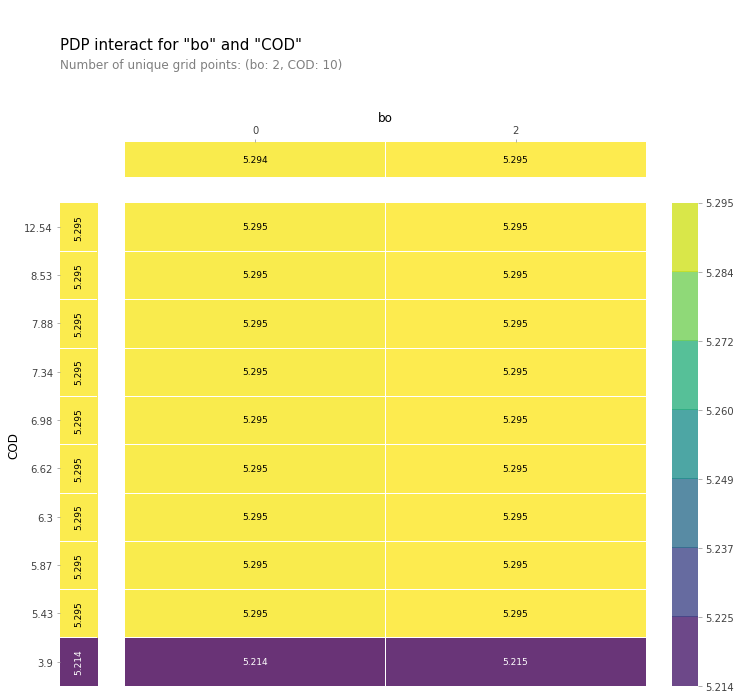

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = clf,
    dataset = data,
    model_features = features,
    features = ['보개방 여부', 'COD_금본H']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['bo', 'COD'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)

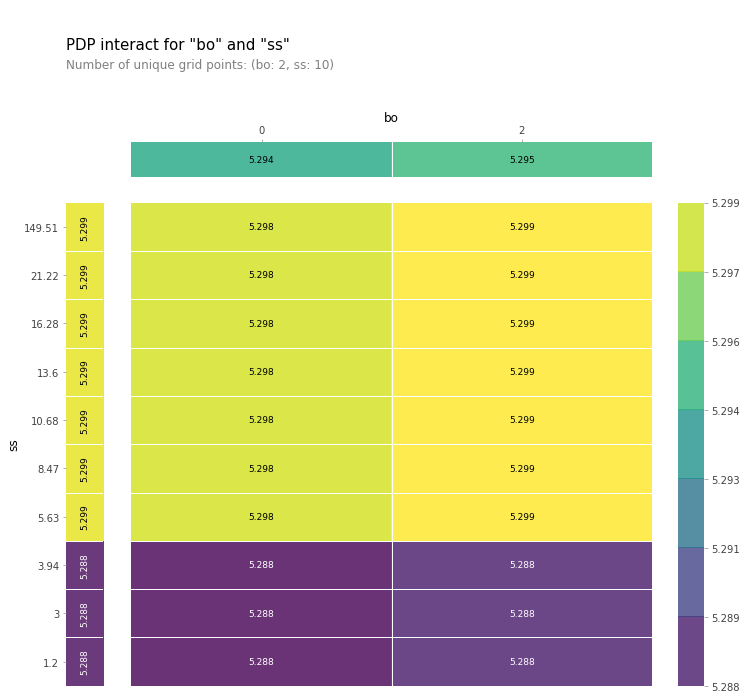

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = clf,
    dataset = data,
    model_features = features,
    features = ['보개방 여부', 'SS_금본H']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['bo', 'ss'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)

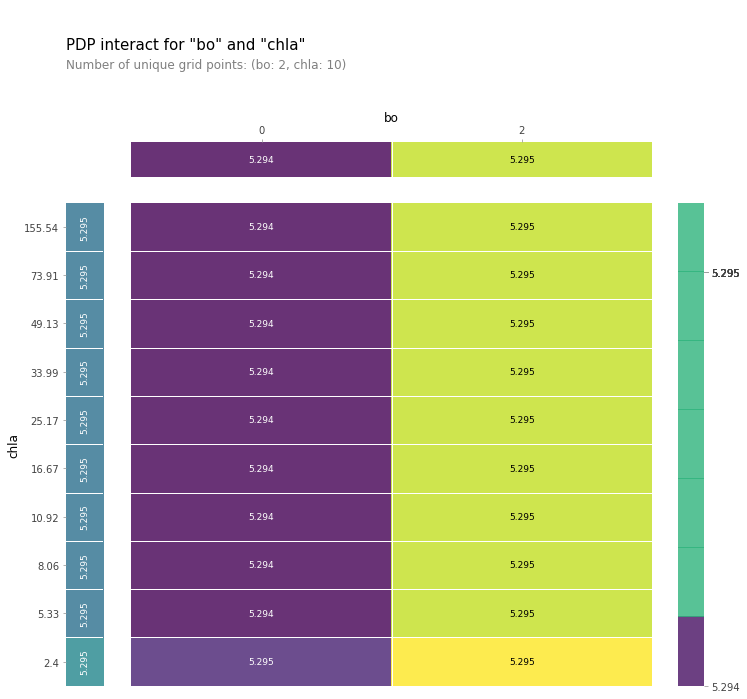

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = clf,
    dataset = data,
    model_features = features,
    features = ['보개방 여부', 'CHLA_금본H']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['bo', 'chla'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)

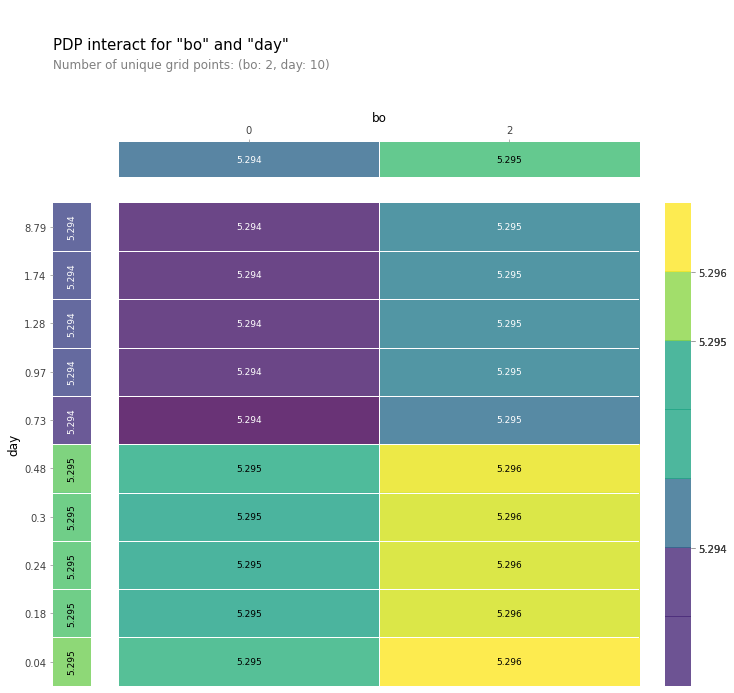

In [ ]:
pdp_interaction = pdp.pdp_interact(
    model = clf,
    dataset = data,
    model_features = features,
    features = ['보개방 여부', '체류시간(day)_세종보']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out = pdp_interaction,
    feature_names = ['bo', 'day'],
    plot_type = 'grid',
    x_quantile = True,
    plot_pdp = True
)